# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D, Flatten, Dense, Dropout, Activation , Concatenate, Input , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator ,img_to_array, load_img
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import SGD
from keras.utils import plot_model
from keras import Model
from sklearn.metrics import confusion_matrix

In [5]:
Archive=r'/content/drive/My Drive/Sandy/Gender recog/archive.zip'


In [6]:
from zipfile import ZipFile
with ZipFile(Archive,'r') as z:
    z.extractall()
print('Archive Extraction done')

Archive Extraction done


In [7]:
train_dir=r"/content/Training"
val_dir=r"/content/Validation"

train_dir_male = train_dir + '/male'
train_dir_female = train_dir + '/female'

val_dir_male  = val_dir + '/male'
val_dir_female  = val_dir + '/female'

In [8]:
print('number of male training images - ',len(os.listdir(train_dir_male)))
print('number of female training images - ',len(os.listdir(train_dir_female)))
print('----------------------------------------------------------------------')
print('number of normal validation  images - ',len(os.listdir(val_dir_male)))
print('number of pneumonia validation  images - ',len(os.listdir(val_dir_female)))

number of male training images -  23766
number of female training images -  23243
----------------------------------------------------------------------
number of normal validation  images -  5808
number of pneumonia validation  images -  5841


In [9]:
data_generator = ImageDataGenerator(rescale= 1./255 , validation_split=0.2)

In [10]:
batch_size = 64

training_data = data_generator.flow_from_directory(directory = train_dir,
                                                   target_size = (64, 64),
                                                   class_mode='binary',
                                                   color_mode= "rgb",
                                                   subset='training',
                                                   batch_size = batch_size)

testing_data = data_generator.flow_from_directory(directory = train_dir,
                                                  target_size = (64, 64),
                                                  class_mode='binary',
                                                  color_mode= "rgb",
                                                  subset='validation',
                                                  batch_size = batch_size)

validation_data = data_generator.flow_from_directory(directory = val_dir,
                                                  target_size = (64, 64),
                                                  class_mode= None,
                                                  color_mode= "rgb",
                                                  batch_size = batch_size)


evaluation_generator = data_generator.flow_from_directory(directory = val_dir,
                                                  target_size = (64, 64),
                                                  class_mode= 'binary',
                                                  color_mode= "rgb",
                                                  batch_size = batch_size)

Found 37608 images belonging to 2 classes.
Found 9401 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


In [11]:
set(training_data.classes)

{0, 1}

In [12]:
labels = (testing_data.class_indices)
print (labels)

{'female': 0, 'male': 1}


In [13]:
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=2, patience=8)

In [14]:
input_model = Input(training_data.image_shape)


model1 = Conv2D(16,(7,7), activation='relu')(input_model)
model1 = Conv2D(32,(6,6), activation='relu', padding='same')(model1)
model1 = BatchNormalization()(model1)
model1 = MaxPooling2D((2,2))(model1)
model1 = Conv2D(32,(6,6), activation='relu' ,padding='same')(model1)
model1 = Conv2D(64,(5,5), activation='relu' ,padding='same')(model1)
model1 = BatchNormalization()(model1)
model1 = AveragePooling2D((2, 2))(model1)
model1 = Conv2D(64,(5,5), activation='relu' ,padding='same')(model1)
model1 = Conv2D(128,(5,5), activation='relu' ,padding='same')(model1)
model1 = BatchNormalization()(model1)
model1 = AveragePooling2D((2, 2))(model1)
model1 = Conv2D(256,(4,4), activation='relu' ,padding='same')(model1)
model1 = Conv2D(256,(4,4), activation='relu' ,padding='same')(model1)
model1 = BatchNormalization()(model1)
model1 = MaxPooling2D((2, 2))(model1)
model1 = Conv2D(512,(3,3), activation='relu' ,padding='same')(model1)
model1 = Conv2D(512,(3,3), activation='relu' ,padding='valid')(model1)
model1 = BatchNormalization()(model1)
model1 = Flatten()(model1)
#########################################################                          
model2 = Conv2D(16,(4,4), activation='relu')(input_model)  
model2 = Conv2D(16,(4,4), activation='relu', padding='same')(model2)
model2 = BatchNormalization()(model2)
model2 = MaxPooling2D((3, 3))(model2)
model2 = Conv2D(32,(3,3), activation='relu', padding='same')(model2) 
model2 = Conv2D(32,(3,3), activation='relu', padding='same')(model2)
model2 = BatchNormalization()(model2)
model2 = AveragePooling2D((2, 2))(model2)
model2 = Conv2D(32,(3,3), activation='relu', padding='same')(model2)
model2 = Conv2D(64,(2,2), activation='relu' ,padding='same')(model2)
model2 = BatchNormalization()(model2)
model2 = AveragePooling2D((2, 2))(model2)
model2 = Conv2D(64,(2,2), activation='relu' ,padding='same')(model2)
model2 = Conv2D(64,(2,2), activation='relu' ,padding='same')(model2)
model2 = BatchNormalization()(model2)
model2 = AveragePooling2D((2, 2))(model2)
model2 = Conv2D(128,(1,1), activation='relu' ,padding='same')(model2)
model2 = Conv2D(128,(1,1), activation='relu' ,padding='same')(model2)
model2 = BatchNormalization()(model2)
model2 = AveragePooling2D((2, 2))(model2)
model2 = Conv2D(256,(1,1), activation='relu' ,padding='same')(model2)
model2 = Conv2D(512,(1,1), activation='relu' ,padding='valid')(model2)
model2 = BatchNormalization()(model2)
model2 = Flatten()(model2)
########################################################
merged = Concatenate()([model1, model2])
merged = Dense(units = 512, activation = 'relu')(merged)
merged = BatchNormalization()(merged)
merged = Dropout(rate = 0.2)(merged)
merged = Dense(units = 64, activation = 'relu')(merged)
merged = Dense(units = 32, activation = 'relu')(merged)
merged = Dense(units = 16, activation = 'relu')(merged)
merged = Dense(units = 8, activation = 'relu')(merged)
merged = Dense(units = 4, activation = 'relu')(merged)
merged = Dense(units = 2, activation = 'relu')(merged)
output = Dense(activation = 'sigmoid', units = 1)(merged)

model = Model(inputs= [input_model], outputs=[output])

In [15]:
sgd = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 61, 61, 16)   784         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 61, 61, 16)   4112        conv2d_10[0][0]                  
__________________________________________________________________________________________________
batch_normalization_5 (BatchNor (None, 61, 61, 16)   64          conv2d_11[0][0]                  
_______________________________________________________________________________________

In [17]:
history =  model.fit_generator(generator = training_data,
                               epochs = 5,
                               #steps_per_epoch = int(len(training_data)/batch_size),
                               validation_data = testing_data ,
                               #validation_steps = int(len(testing_data)/batch_size),
                               callbacks=[es],
                               verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
588/588 [==============================] - 74s 126ms/step - loss: 0.4313 - accuracy: 0.8001 - val_loss: 0.2946 - val_accuracy: 0.8888
Epoch 2/5
588/588 [==============================] - 72s 123ms/step - loss: 0.1812 - accuracy: 0.9384 - val_loss: 0.1984 - val_accuracy: 0.9251
Epoch 3/5
588/588 [==============================] - 72s 122ms/step - loss: 0.1472 - accuracy: 0.9495 - val_loss: 0.1289 - val_accuracy: 0.9580
Epoch 4/5
588/588 [==============================] - 72s 122ms/step - loss: 0.1290 - accuracy: 0.9563 - val_loss: 0.1593 - val_accuracy: 0.9428
Epoch 5/5
588/588 [==============================] - 72s 122ms/step - loss: 0.1168 - accuracy: 0.9601 - val_loss: 0.1356 - val_accuracy: 0.9546


In [18]:
model.save_weights("weights.h5")

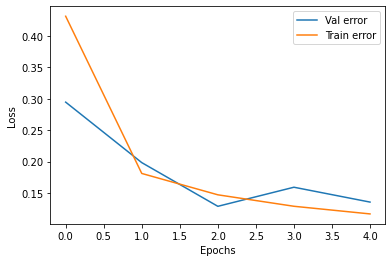

In [19]:
val_loss = history.history['val_loss']
loss = history.history['loss']

plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Val error','Train error'], loc='upper right')
plt.savefig('plot_error.png')
plt.show()

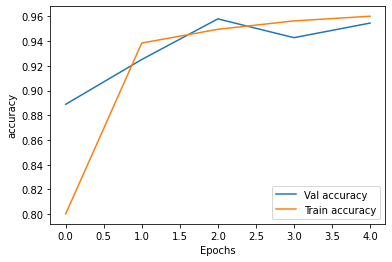

In [20]:
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

plt.plot(val_accuracy)
plt.plot(accuracy)
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Val accuracy','Train accuracy'], loc='lower right')
plt.savefig( 'plot_accuracy.png')
plt.show()

In [21]:
#evaluate the model
scores = model.evaluate_generator(evaluation_generator)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Instructions for updating:
Please use Model.evaluate, which supports generators.

accuracy: 95.47%


In [22]:
pred = model.predict_generator(validation_data)
print(pred.shape)

Instructions for updating:
Please use Model.predict, which supports generators.
(11649, 1)


In [23]:
pred = pred.reshape(1,pred.shape[0])
predicted_class_indices= np.round_(pred)
labels = (validation_data.class_indices)
print(predicted_class_indices)
print (labels)

[[0. 0. 0. ... 1. 0. 0.]]
{'female': 0, 'male': 1}


In [24]:
true_labels = []
perdict_labels = predicted_class_indices[0]

for i in range(len(glob.glob(val_dir_female +'/*'))):
    true_labels.append(0)
for i in range(len(glob.glob(val_dir_male +'/*'))):
    true_labels.append(1)

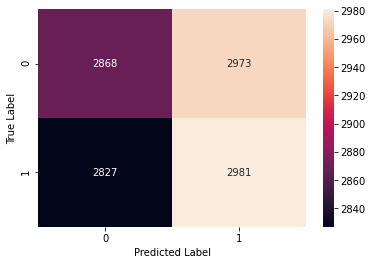

<Figure size 432x288 with 0 Axes>

In [25]:
cm = confusion_matrix(true_labels, perdict_labels)
sns.heatmap(cm, fmt='4',annot=True).set(ylabel="True Label", xlabel="Predicted Label")
plt.show()
plt.savefig('confusion_matrix.jpg')

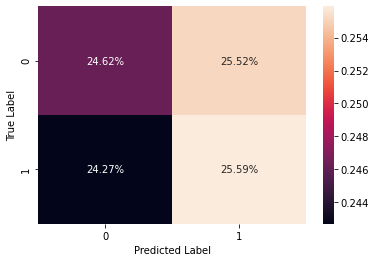

<Figure size 432x288 with 0 Axes>

In [26]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%').set(ylabel="True Label", xlabel="Predicted Label")
plt.show()
plt.savefig('confusion_matrix_percentage.jpg')

True Label female - Perdict Label : female
{'female': 0, 'male': 1}


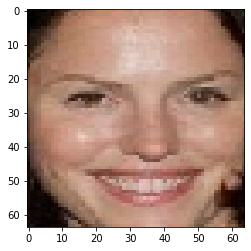

True Label female - Perdict Label : female
{'female': 0, 'male': 1}


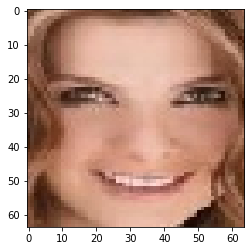

True Label female - Perdict Label : female
{'female': 0, 'male': 1}


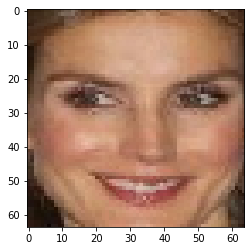

True Label female - Perdict Label : female
{'female': 0, 'male': 1}


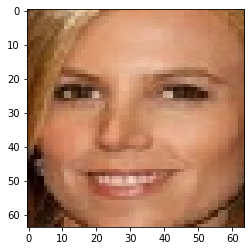

True Label female - Perdict Label : female
{'female': 0, 'male': 1}


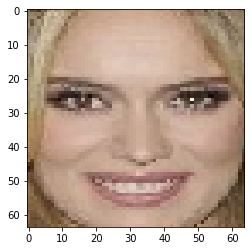

True Label female - Perdict Label : female
{'female': 0, 'male': 1}


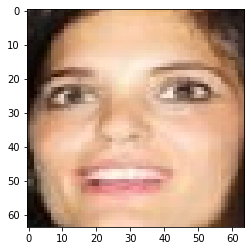

True Label female - Perdict Label : female
{'female': 0, 'male': 1}


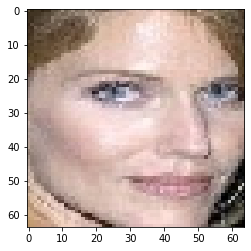

True Label female - Perdict Label : male
{'female': 0, 'male': 1}


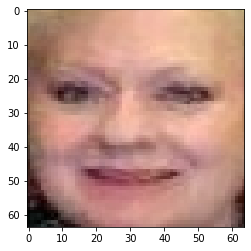

True Label female - Perdict Label : female
{'female': 0, 'male': 1}


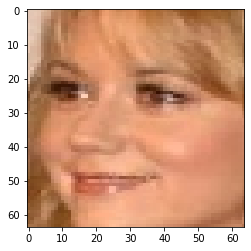

True Label female - Perdict Label : female
{'female': 0, 'male': 1}


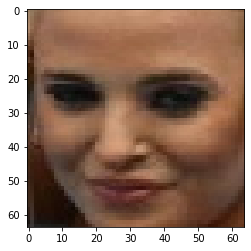

In [27]:
paths = glob.glob(val_dir_female +'/*')
for i in range(0,10):
    test_image = image.load_img(paths[i], target_size = (64, 64))
    plt.imshow(test_image)
    if predicted_class_indices[0][i] == 0:
        pred_label = 'female'
    else:
        pred_label = 'male'
    
    print('True Label female - Perdict Label : {}'.format(pred_label))
    labels = (training_data.class_indices)
    print (labels)
    plt.show()